In [1]:
import pandas as pd
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
nyc_map = gpd.read_file("taxi_zones/taxi_zones.shp")

<Axes: >

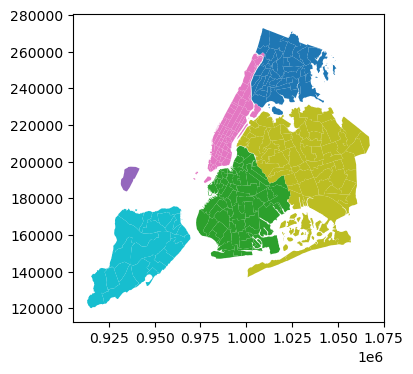

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
nyc_map.plot(ax = ax, column = "borough")

In [4]:
uber_df = pd.read_csv('mergeduber.csv')
lyft_df = pd.read_csv('mergedlyft.csv')
uber_mean_wait = uber_df.groupby(["PULocationID"])["wait_min"].mean()
lyft_mean_wait = lyft_df.groupby(["PULocationID"])["wait_min"].mean()
uber_avg_wait = pd.DataFrame(uber_mean_wait)
lyft_avg_wait = pd.DataFrame(lyft_mean_wait)

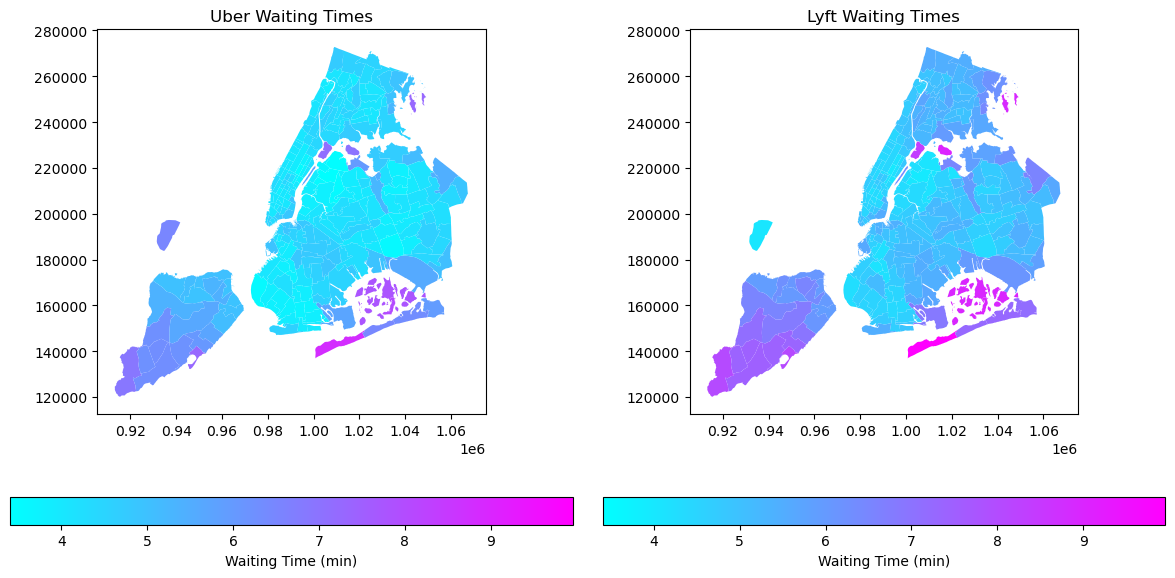

In [5]:
lyft = pd.merge(nyc_map, lyft_avg_wait, left_on = "LocationID", right_on = "PULocationID", how = "left")
uber = pd.merge(nyc_map, uber_avg_wait, left_on = "LocationID", right_on = "PULocationID", how = "left")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

vmin = min(uber['wait_min'].min(), lyft['wait_min'].min())
vmax = max(uber['wait_min'].max(), lyft['wait_min'].max())

uber_plot = uber.plot(ax=ax1, column='wait_min', legend=True, vmin=vmin, vmax=vmax, legend_kwds={'label': 'Waiting Time (min)', 'orientation': "horizontal"}, cmap = "cool")
lyft_plot = lyft.plot(ax=ax2, column='wait_min', legend=True, vmin=vmin, vmax=vmax, legend_kwds={'label': 'Waiting Time (min)', 'orientation': "horizontal"}, cmap = "cool")


ax1.set_title('Uber Waiting Times')
ax2.set_title('Lyft Waiting Times')

plt.tight_layout()
plt.show()


In [6]:
summary =  pd.read_csv('mergedSummary.csv')

In [7]:
lyft_summary = summary[summary['company']=="Lyft"]
uber_summary = summary[summary['company']=="Uber"]

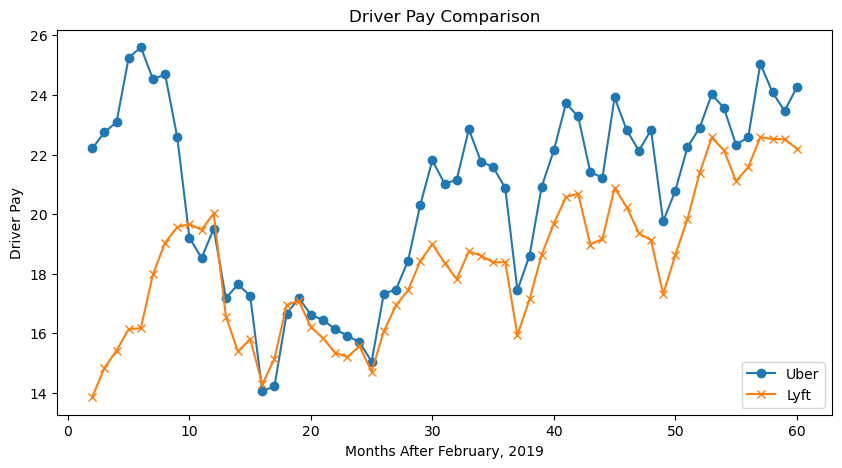

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot Uber data
plt.plot(uber_summary['index'], uber_summary['driver_pay'], label='Uber', marker='o')

# Plot Lyft data
plt.plot(lyft_summary['index'], lyft_summary['driver_pay'], label='Lyft', marker='x')

plt.xlabel('Months After February, 2019')
plt.ylabel('Driver Pay')
plt.title('Driver Pay Comparison')
plt.legend()
plt.show()


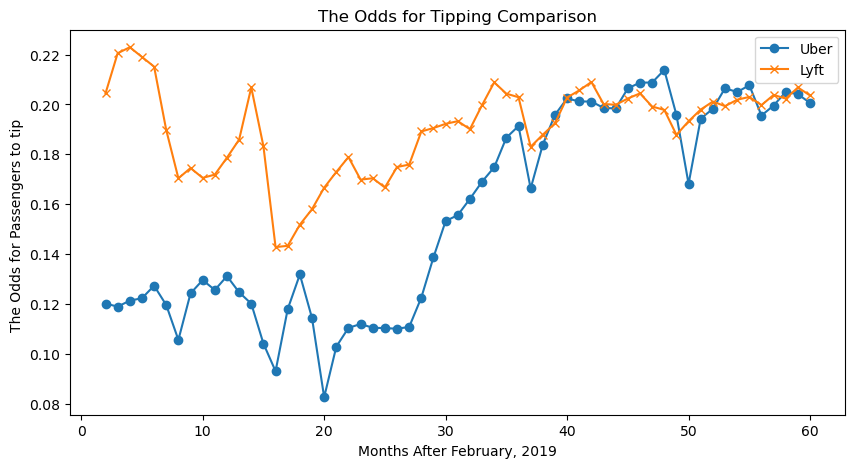

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot Uber data
plt.plot(uber_summary['index'], uber_summary['tips_propotion'], label='Uber', marker='o')

# Plot Lyft data
plt.plot(lyft_summary['index'], lyft_summary['tips_propotion'], label='Lyft', marker='x')

plt.xlabel('Months After February, 2019')
plt.ylabel('The Odds for Passengers to tip ')
plt.title('The Odds for Tipping Comparison')
plt.legend()
plt.show()